In [1]:
from ising.lattices import square_random_lattice
import ising.checkerboard as checkerboard
import ising.metropolis as metropolis
from ising.visualize import lattices_to_images, upscale_lattices, display_experiment, save_gif
import matplotlib.pyplot as plt
import numpy as np
import ising.plot_styling

In [2]:
N, M = 150, 150
UP_SCALE = 4
STEPS_METROPOLIS = 80_000
STEPS_CHECKERBOARD = 25

J = 1
h = 1
T = 4

lattice = square_random_lattice(N, M, states=[-1, 1])

In [3]:
magnetization_checkerboard = np.empty(1000)
i = 0
temps_checkerboard = np.linspace(1, 10, 1000)
for temp in temps_checkerboard:
    magnetization_checkerboard[i] = np.average(
        np.average(
            checkerboard.simulate(
                lattice.copy(), J=J, h=h, T=temp, steps=STEPS_CHECKERBOARD), 
                axis=(0, 1))[-10:]
    )
    i += 1

In [4]:
magnetization_metropolis = np.empty(20)
i = 0
temps_metropolis = np.linspace(1.5, 8, 20)
for temp in temps_metropolis:
    
    magnetization_metropolis[i] = np.average(
        np.average(
            metropolis.simulate(
                lattice.copy(), J=J, h=h, T=temp, steps=STEPS_METROPOLIS
            ),
            axis=(0, 1),
        )[-10:]
    )
    i += 1

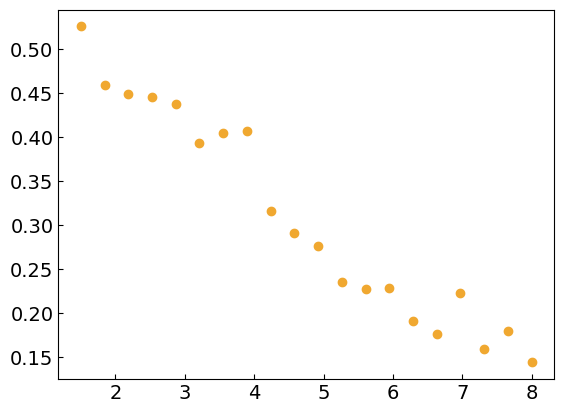

In [5]:
plt.scatter(temps_metropolis, magnetization_metropolis)

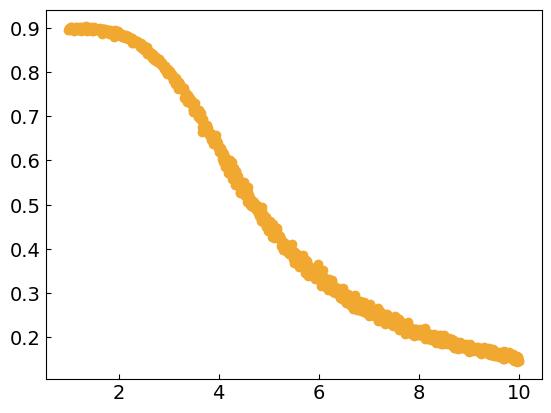

In [6]:
plt.scatter(temps_checkerboard, magnetization_checkerboard)

In [7]:
lattices_checkerboard = checkerboard.simulate(
    lattice.copy(), J=J, h=h, T=T, steps=STEPS_CHECKERBOARD
    )

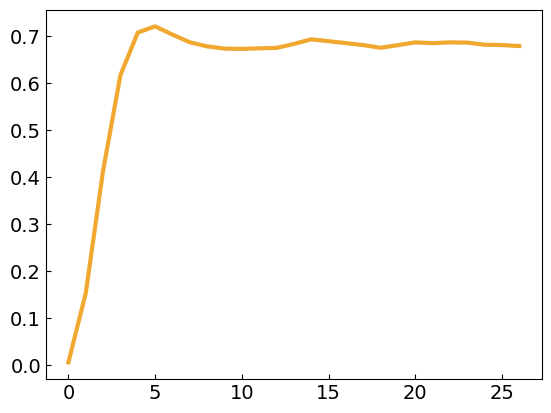

In [8]:
plt.plot(
    range(len(np.average(lattices_checkerboard, axis=(2,1)))), 
    np.average(lattices_checkerboard, axis=(2, 1))
    )

In [9]:
lattices_metropolis = metropolis.simulate(
    lattice.copy(), J=J, h=h, T=T, steps=STEPS_METROPOLIS
    )

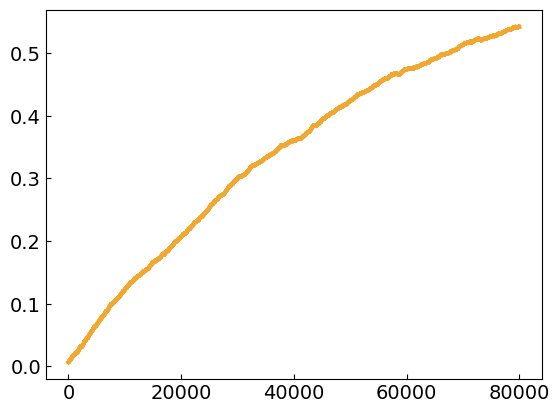

In [10]:
plt.plot(
    range(STEPS_METROPOLIS + 1), 
    np.average(lattices_metropolis, axis=(2, 1))
    )

In [11]:
gif_metropolis = lattices_to_images(
    upscale_lattices(lattices_metropolis[::100], UP_SCALE)
    )

In [12]:
gif_checkerboard = lattices_to_images(
    upscale_lattices(lattices_checkerboard, UP_SCALE)
    )

In [13]:
display_experiment(gif_metropolis)

interactive(children=(IntSlider(value=400, description='frame', max=800), Output()), _dom_classes=('widget-int…

<function ising.visualize.display_experiment.<locals>._show(frame=(0, 800))>

In [14]:
display_experiment(gif_checkerboard)

interactive(children=(IntSlider(value=13, description='frame', max=26), Output()), _dom_classes=('widget-inter…

<function ising.visualize.display_experiment.<locals>._show(frame=(0, 26))>

In [15]:
save_gif(gif_metropolis, "metropolis")

In [ ]:
save_gif(gif_checkerboard, "checkerboard")